In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

In [94]:
dataset = pd.read_csv('Pengunjung_mall.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [95]:
dataset.head()

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


In [96]:
print(x)

[[ 19  15]
 [ 21  15]
 [ 20  16]
 [ 23  16]
 [ 31  17]
 [ 22  17]
 [ 35  18]
 [ 23  18]
 [ 64  19]
 [ 30  19]
 [ 67  19]
 [ 35  19]
 [ 58  20]
 [ 24  20]
 [ 37  20]
 [ 22  20]
 [ 35  21]
 [ 20  21]
 [ 52  23]
 [ 35  23]
 [ 35  24]
 [ 25  24]
 [ 46  25]
 [ 31  25]
 [ 54  28]
 [ 29  28]
 [ 45  28]
 [ 35  28]
 [ 40  29]
 [ 23  29]
 [ 60  30]
 [ 21  30]
 [ 53  33]
 [ 18  33]
 [ 49  33]
 [ 21  33]
 [ 42  34]
 [ 30  34]
 [ 36  37]
 [ 20  37]
 [ 65  38]
 [ 24  38]
 [ 48  39]
 [ 31  39]
 [ 49  39]
 [ 24  39]
 [ 50  40]
 [ 27  40]
 [ 29  40]
 [ 31  40]
 [ 49  42]
 [ 33  42]
 [ 31  43]
 [ 59  43]
 [ 50  43]
 [ 47  43]
 [ 51  44]
 [ 69  44]
 [ 27  46]
 [ 53  46]
 [ 70  46]
 [ 19  46]
 [ 67  47]
 [ 54  47]
 [ 63  48]
 [ 18  48]
 [ 43  48]
 [ 68  48]
 [ 19  48]
 [ 32  48]
 [ 70  49]
 [ 47  49]
 [ 60  50]
 [ 60  50]
 [ 59  54]
 [ 26  54]
 [ 45  54]
 [ 40  54]
 [ 23  54]
 [ 49  54]
 [ 57  54]
 [ 38  54]
 [ 67  54]
 [ 46  54]
 [ 21  54]
 [ 48  54]
 [ 55  57]
 [ 22  57]
 [ 34  58]
 [ 50  58]
 [ 68  59]

In [97]:
print(y)

[39 81  6 77 40 76  6 94  3 72 14 99 15 77 13 79 35 66 29 98 35 73  5 73
 14 82 32 61 31 87  4 73  4 92 14 81 17 73 26 75 35 92 36 61 28 65 55 47
 42 42 52 60 54 60 45 41 50 46 51 46 56 55 52 59 51 59 50 48 59 47 55 42
 49 56 47 54 53 48 52 42 51 55 41 44 57 46 58 55 60 46 55 41 49 40 42 52
 47 50 42 49 41 48 59 55 56 42 50 46 43 48 52 54 42 46 48 50 43 59 43 57
 56 40 58 91 29 77 35 95 11 75  9 75 34 71  5 88  7 73 10 72  5 93 40 87
 12 97 36 74 22 90 17 88 20 76 16 89  1 78  1 73 35 83  5 93 26 75 20 95
 27 63 13 75 10 92 13 86 15 69 14 90 32 86 15 88 39 97 24 68 17 85 23 69
  8 91 16 79 28 74 18 83]


In [98]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [99]:
print(x_train)

[[ 47  49]
 [ 23  70]
 [ 41  99]
 [ 27  60]
 [ 34  78]
 [ 54  28]
 [ 60  30]
 [ 56  79]
 [ 65  38]
 [ 51  44]
 [ 39  71]
 [ 47  60]
 [ 32  97]
 [ 35  23]
 [ 38  78]
 [ 48  60]
 [ 50  43]
 [ 31  81]
 [ 33  42]
 [ 55  57]
 [ 35  74]
 [ 68  59]
 [ 32  73]
 [ 49  62]
 [ 25  77]
 [ 50  58]
 [ 66  63]
 [ 37  20]
 [ 35  28]
 [ 32  75]
 [ 28 101]
 [ 50  40]
 [ 19  74]
 [ 35 120]
 [ 68  63]
 [ 67  47]
 [ 20  16]
 [ 53  46]
 [ 44  73]
 [ 32 126]
 [ 31  39]
 [ 67  19]
 [ 47 120]
 [ 60  50]
 [ 45 126]
 [ 59  93]
 [ 30  88]
 [ 43  71]
 [ 40  60]
 [ 38  64]
 [ 34  78]
 [ 32 103]
 [ 49  42]
 [ 19  15]
 [ 32  60]
 [ 65  63]
 [ 24  60]
 [ 63  48]
 [ 33  86]
 [ 24  38]
 [ 32  48]
 [ 31  40]
 [ 29  40]
 [ 48  54]
 [ 24  20]
 [ 29  79]
 [ 31  25]
 [ 54 101]
 [ 29  73]
 [ 35  24]
 [ 22  20]
 [ 23  54]
 [ 49  62]
 [ 31  43]
 [ 23  62]
 [ 45  54]
 [ 23  16]
 [ 63  65]
 [ 50  85]
 [ 32 137]
 [ 35  18]
 [ 19  48]
 [ 21  54]
 [ 38  67]
 [ 27  78]
 [ 28  87]
 [ 37  78]
 [ 18  59]
 [ 30 137]
 [ 35  19]
 [ 50  67]

In [100]:
print(x_test)

[[ 52  23]
 [ 40  87]
 [ 54  63]
 [ 48  61]
 [ 27  88]
 [ 46  98]
 [ 22  17]
 [ 48  77]
 [ 58  20]
 [ 44  78]
 [ 19  46]
 [ 31  70]
 [ 37  97]
 [ 47  78]
 [ 57  54]
 [ 23  18]
 [ 18  33]
 [ 47  71]
 [ 30  34]
 [ 59  54]
 [ 29  98]
 [ 28  77]
 [ 24  39]
 [ 30  78]
 [ 70  46]
 [ 39  69]
 [ 35  93]
 [ 30  99]
 [ 40  69]
 [ 49  39]
 [ 35  21]
 [ 47  43]
 [ 43  78]
 [ 19  63]
 [ 46  25]
 [ 36 103]
 [ 38  71]
 [ 31  17]
 [ 46  54]
 [ 66  63]
 [ 20  73]
 [ 43  48]
 [ 45  28]
 [ 19  64]
 [ 36  87]
 [ 54  47]
 [ 64  19]
 [ 26  54]
 [ 51  67]
 [ 32  76]]


In [101]:
print(y_test)

[29 13 46 42 69 15 76 36 15 20 55 77 32 16 51 94 92  9 73 47 88 97 65 73
 56 91 90 97 58 28 35 41 17 54  5 85 75 40 44 50  5 50 32 46 27 59  3 54
 43 87]


In [102]:
print(y_train)

[42 29 39 50 90 14  4 35 35 50 75 47 86 98 76 49 45 93 60 58 72 55 73 48
 12 46 48 13 61 93 68 55 10 79 43 52  6 46  7 74 61 14 16 56 28 14 86 35
 40 42  1 69 52 39 42 52 52 51 95 92 47 42 42 46 77 83 73 24 88 35 79 52
 56 54 41 53 77 43 26 18  6 59 57 40 89 75  1 41 83 99 57 59 81 46 59 81
 56  5 36 42 34 92 66 26 71 60 78 11 14 31 48 88 73 20 95 15  4 40 63 74
 87 49 41 42 50 22 91 49 48 82 75 55 17 13 23 75 51  5 60 55 55 17 73 72
 55 48  8 59 47 10]


In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [104]:
print(x_train)

[[ 0.59131873 -0.44803883]
 [-1.10084935  0.34173303]
 [ 0.16827671  1.43237037]
 [-0.81882133 -0.03434881]
 [-0.32527231  0.6425985 ]
 [ 1.08486776 -1.23781069]
 [ 1.50790978 -1.16259433]
 [ 1.22588177  0.68020669]
 [ 1.8604448  -0.86172885]
 [ 0.87334675 -0.63607975]
 [ 0.02726271  0.37934122]
 [ 0.59131873 -0.03434881]
 [-0.46628632  1.357154  ]
 [-0.25476531 -1.42585161]
 [-0.0432443   0.6425985 ]
 [ 0.66182574 -0.03434881]
 [ 0.80283975 -0.67368793]
 [-0.53679332  0.75542305]
 [-0.39577931 -0.71129612]
 [ 1.15537476 -0.14717336]
 [-0.25476531  0.49216577]
 [ 2.07196581 -0.07195699]
 [-0.46628632  0.45455758]
 [ 0.73233274  0.04086756]
 [-0.95983534  0.60499032]
 [ 0.80283975 -0.10956518]
 [ 1.9309518   0.07847574]
 [-0.1137513  -1.53867617]
 [-0.25476531 -1.23781069]
 [-0.46628632  0.52977395]
 [-0.74831433  1.50758673]
 [ 0.80283975 -0.78651249]
 [-1.38287736  0.49216577]
 [-0.25476531  2.22214223]
 [ 2.07196581  0.07847574]
 [ 2.0014588  -0.5232552 ]
 [-1.31237036 -1.6891089 ]
 

In [105]:
print(x_test)

[[ 0.94720275 -1.46237683]
 [ 0.03350235  1.10179076]
 [ 1.09948615  0.14022792]
 [ 0.64263595  0.06009768]
 [-0.95633976  1.14185588]
 [ 0.49035255  1.54250707]
 [-1.33704826 -1.70276754]
 [ 0.64263595  0.70113958]
 [ 1.40405295 -1.58257219]
 [ 0.33806915  0.7412047 ]
 [-1.56547336 -0.5408791 ]
 [-0.65177295  0.42068375]
 [-0.19492275  1.50244195]
 [ 0.56649425  0.7412047 ]
 [ 1.32791125 -0.22035815]
 [-1.26090656 -1.66270242]
 [-1.64161506 -1.06172564]
 [ 0.56649425  0.46074886]
 [-0.72791466 -1.02166053]
 [ 1.48019465 -0.22035815]
 [-0.80405636  1.54250707]
 [-0.88019806  0.70113958]
 [-1.18476486 -0.82133493]
 [-0.72791466  0.7412047 ]
 [ 2.31775336 -0.5408791 ]
 [-0.04263935  0.38061863]
 [-0.34720615  1.34218148]
 [-0.72791466  1.58257219]
 [ 0.03350235  0.38061863]
 [ 0.71877765 -0.82133493]
 [-0.34720615 -1.54250707]
 [ 0.56649425 -0.66107446]
 [ 0.26192745  0.7412047 ]
 [-1.56547336  0.14022792]
 [ 0.49035255 -1.38224659]
 [-0.27106445  1.74283266]
 [-0.11878105  0.46074886]
 

In [106]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
print(x_train)

[[ 0.59131873 -0.44803883]
 [-1.10084935  0.34173303]
 [ 0.16827671  1.43237037]
 [-0.81882133 -0.03434881]
 [-0.32527231  0.6425985 ]
 [ 1.08486776 -1.23781069]
 [ 1.50790978 -1.16259433]
 [ 1.22588177  0.68020669]
 [ 1.8604448  -0.86172885]
 [ 0.87334675 -0.63607975]
 [ 0.02726271  0.37934122]
 [ 0.59131873 -0.03434881]
 [-0.46628632  1.357154  ]
 [-0.25476531 -1.42585161]
 [-0.0432443   0.6425985 ]
 [ 0.66182574 -0.03434881]
 [ 0.80283975 -0.67368793]
 [-0.53679332  0.75542305]
 [-0.39577931 -0.71129612]
 [ 1.15537476 -0.14717336]
 [-0.25476531  0.49216577]
 [ 2.07196581 -0.07195699]
 [-0.46628632  0.45455758]
 [ 0.73233274  0.04086756]
 [-0.95983534  0.60499032]
 [ 0.80283975 -0.10956518]
 [ 1.9309518   0.07847574]
 [-0.1137513  -1.53867617]
 [-0.25476531 -1.23781069]
 [-0.46628632  0.52977395]
 [-0.74831433  1.50758673]
 [ 0.80283975 -0.78651249]
 [-1.38287736  0.49216577]
 [-0.25476531  2.22214223]
 [ 2.07196581  0.07847574]
 [ 2.0014588  -0.5232552 ]
 [-1.31237036 -1.6891089 ]
 

In [108]:
print(y_train)

[42 29 39 50 90 14  4 35 35 50 75 47 86 98 76 49 45 93 60 58 72 55 73 48
 12 46 48 13 61 93 68 55 10 79 43 52  6 46  7 74 61 14 16 56 28 14 86 35
 40 42  1 69 52 39 42 52 52 51 95 92 47 42 42 46 77 83 73 24 88 35 79 52
 56 54 41 53 77 43 26 18  6 59 57 40 89 75  1 41 83 99 57 59 81 46 59 81
 56  5 36 42 34 92 66 26 71 60 78 11 14 31 48 88 73 20 95 15  4 40 63 74
 87 49 41 42 50 22 91 49 48 82 75 55 17 13 23 75 51  5 60 55 55 17 73 72
 55 48  8 59 47 10]


In [109]:
y_pred = classifier.predict(x_test)

In [110]:
print(x_test)

[[ 0.94720275 -1.46237683]
 [ 0.03350235  1.10179076]
 [ 1.09948615  0.14022792]
 [ 0.64263595  0.06009768]
 [-0.95633976  1.14185588]
 [ 0.49035255  1.54250707]
 [-1.33704826 -1.70276754]
 [ 0.64263595  0.70113958]
 [ 1.40405295 -1.58257219]
 [ 0.33806915  0.7412047 ]
 [-1.56547336 -0.5408791 ]
 [-0.65177295  0.42068375]
 [-0.19492275  1.50244195]
 [ 0.56649425  0.7412047 ]
 [ 1.32791125 -0.22035815]
 [-1.26090656 -1.66270242]
 [-1.64161506 -1.06172564]
 [ 0.56649425  0.46074886]
 [-0.72791466 -1.02166053]
 [ 1.48019465 -0.22035815]
 [-0.80405636  1.54250707]
 [-0.88019806  0.70113958]
 [-1.18476486 -0.82133493]
 [-0.72791466  0.7412047 ]
 [ 2.31775336 -0.5408791 ]
 [-0.04263935  0.38061863]
 [-0.34720615  1.34218148]
 [-0.72791466  1.58257219]
 [ 0.03350235  0.38061863]
 [ 0.71877765 -0.82133493]
 [-0.34720615 -1.54250707]
 [ 0.56649425 -0.66107446]
 [ 0.26192745  0.7412047 ]
 [-1.56547336  0.14022792]
 [ 0.49035255 -1.38224659]
 [-0.27106445  1.74283266]
 [-0.11878105  0.46074886]
 

In [111]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


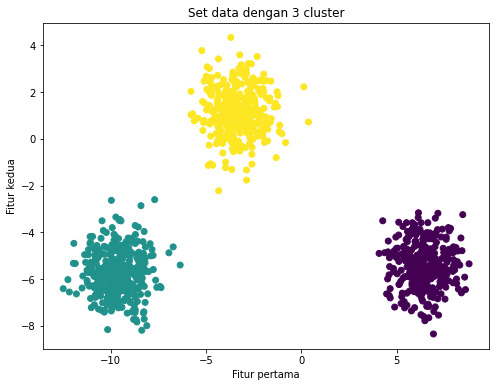

In [112]:
from sklearn.datasets import make_blobs
x, y = make_blobs(centers=3, n_samples=1000)

fig = plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.title("Set data dengan 3 cluster")
plt.xlabel("Fitur pertama")
plt.ylabel("Fitur kedua")
plt.show()